<a href="https://colab.research.google.com/github/canalrafael/Pre-Doc/blob/main/descent_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This notebook aims to understand how Gradient Descent works, following the gradient at each iteration.

In [1]:
import torch
import time
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100, 1])
torch.Size([100, 1])


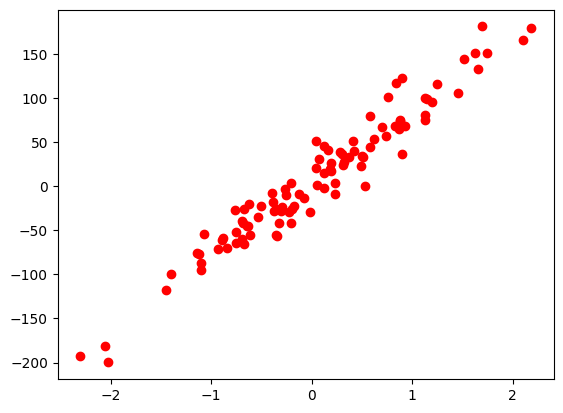

In [2]:
# DATA PREPARATION
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')

In [3]:
# MODEL DEFINITION
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

In [4]:
# DEFINITION OF COST FUNCTION AND OPTIMIZER
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model.parameters())

<generator object Module.parameters at 0x7ecf07989460>


Epoch:  9
Cost: 4363.29296875000000000000
Coefficients: 
m: 12.28678989410400390625
m (gradient): -112.57710266113281250000
b: 1.79930341243743896484
b (gradient): -13.41980743408203125000


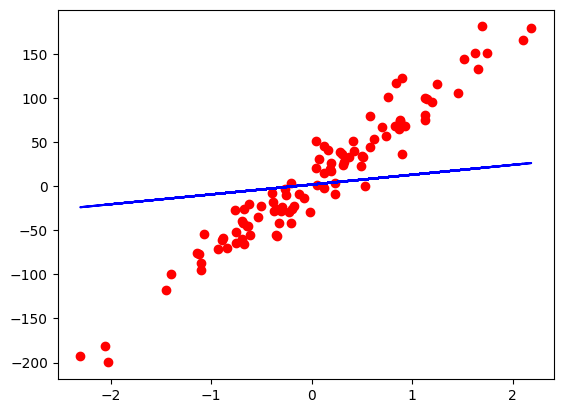

Epoch:  19
Cost: 3256.47680664062500000000
Coefficients: 
m: 22.60654067993164062500
m (gradient): -95.92616271972656250000
b: 2.93481016159057617188
b (gradient): -9.80594062805175781250


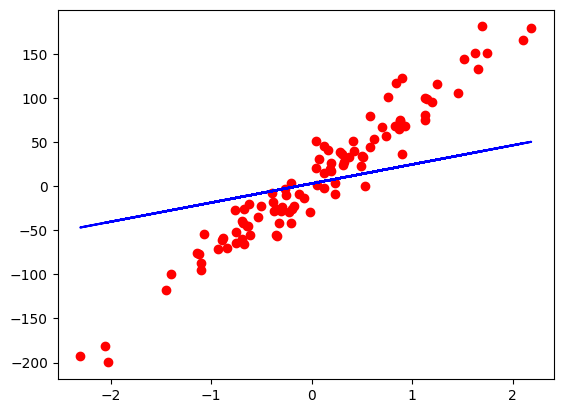

Epoch:  29
Cost: 2455.44384765625000000000
Coefficients: 
m: 31.40090751647949218750
m (gradient): -81.75482177734375000000
b: 3.75635147094726562500
b (gradient): -7.02448177337646484375


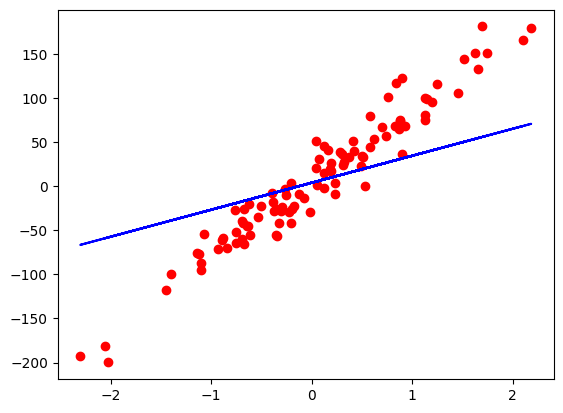

Epoch:  39
Cost: 1875.10559082031250000000
Coefficients: 
m: 38.89686203002929687500
m (gradient): -69.69072723388671875000
b: 4.33705663681030273438
b (gradient): -4.89766788482666015625


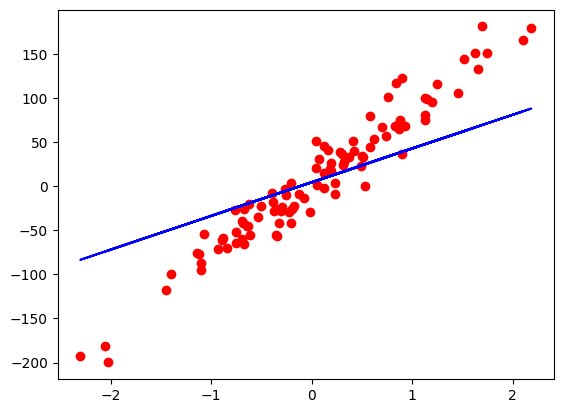

Epoch:  49
Cost: 1454.24963378906250000000
Coefficients: 
m: 45.28733062744140625000
m (gradient): -59.41811752319335937500
b: 4.73434352874755859375
b (gradient): -3.28406715393066406250


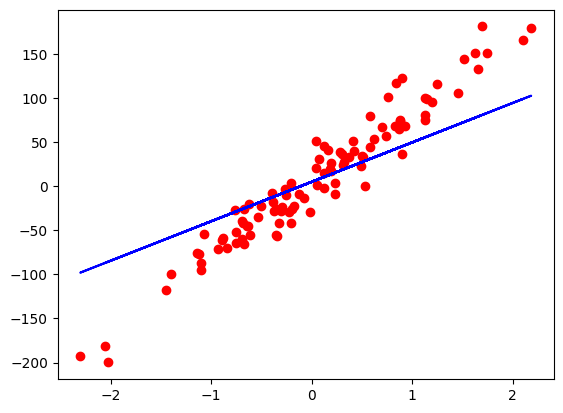

Epoch:  59
Cost: 1148.77478027343750000000
Coefficients: 
m: 50.73635864257812500000
m (gradient): -50.66889953613281250000
b: 4.99314308166503906250
b (gradient): -2.07137727737426757812


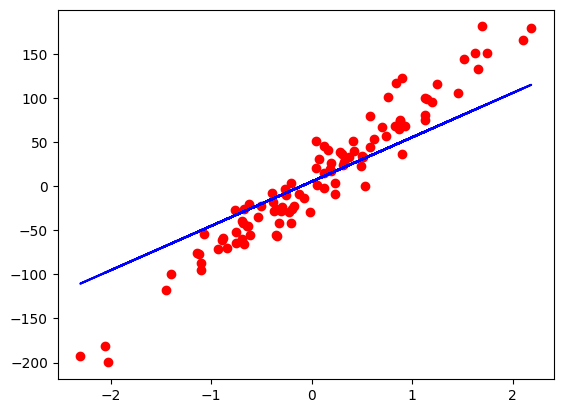

Epoch:  69
Cost: 926.86401367187500000000
Coefficients: 
m: 55.38346862792968750000
m (gradient): -43.21550369262695312500
b: 5.14847993850708007812
b (gradient): -1.17058825492858886719


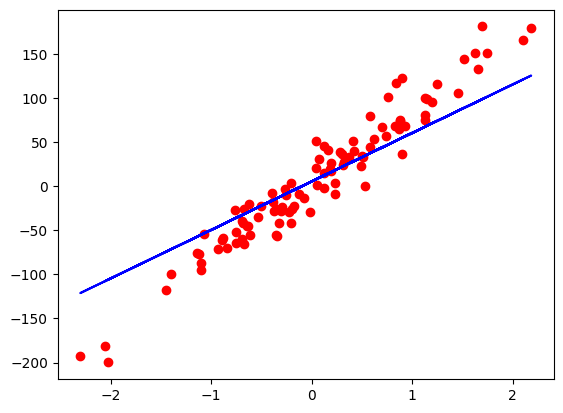

Epoch:  79
Cost: 765.53521728515625000000
Coefficients: 
m: 59.34734344482421875000
m (gradient): -36.86463165283203125000
b: 5.22753524780273437500
b (gradient): -0.51130938529968261719


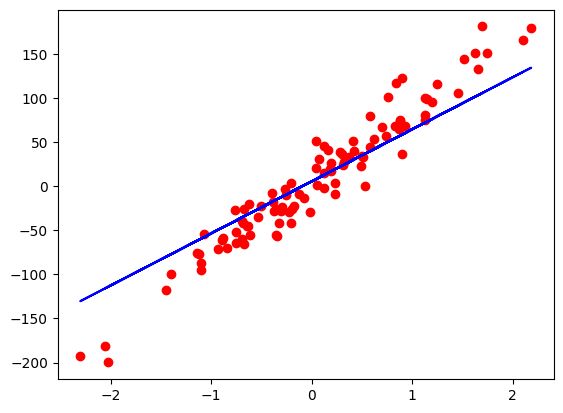

Epoch:  89
Cost: 648.16723632812500000000
Coefficients: 
m: 62.72898483276367187500
m (gradient): -31.45210838317871093750
b: 5.25129699707031250000
b (gradient): -0.03802603483200073242


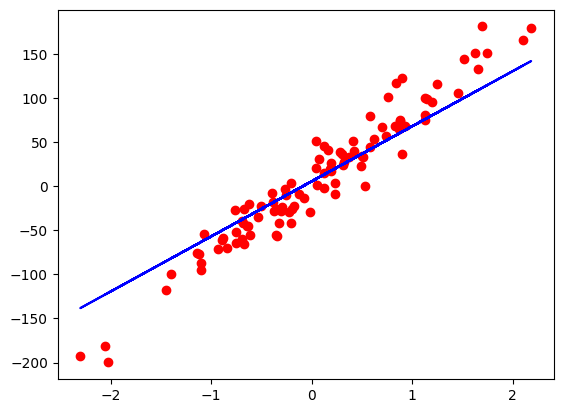

Epoch:  99
Cost: 562.72583007812500000000
Coefficients: 
m: 65.61437225341796875000
m (gradient): -26.83835601806640625000
b: 5.23587560653686523438
b (gradient): 0.29295289516448974609


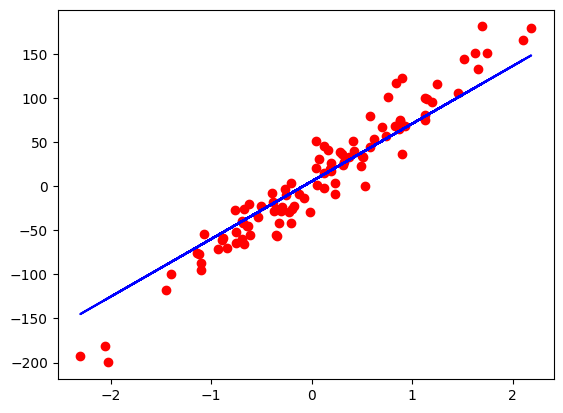

Epoch:  109
Cost: 500.48956298828125000000
Coefficients: 
m: 68.07669067382812500000
m (gradient): -22.90475082397460937500
b: 5.19354820251464843750
b (gradient): 0.51587128639221191406


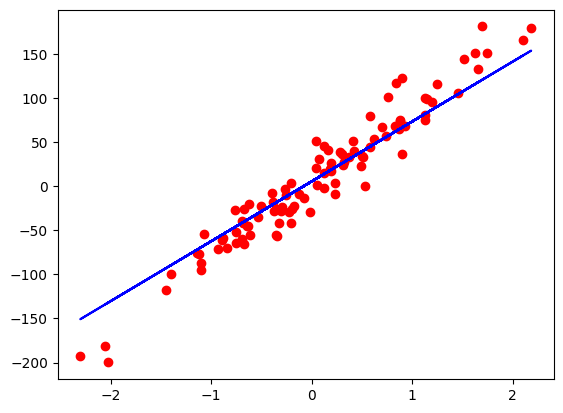

Epoch:  119
Cost: 455.13171386718750000000
Coefficients: 
m: 70.17826843261718750000
m (gradient): -19.55042648315429687500
b: 5.13359451293945312500
b (gradient): 0.65749967098236083984


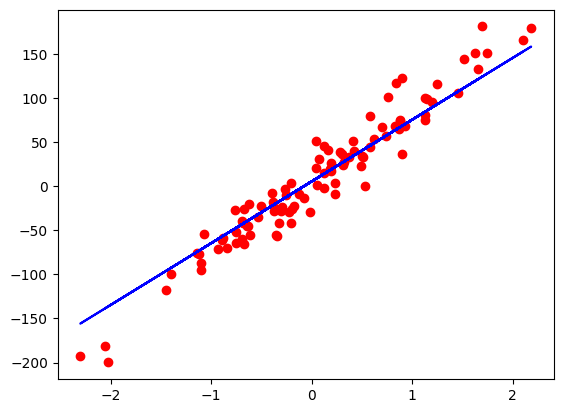

Epoch:  129
Cost: 422.05841064453125000000
Coefficients: 
m: 71.97220611572265625000
m (gradient): -16.68956565856933593750
b: 5.06295347213745117188
b (gradient): 0.73867183923721313477


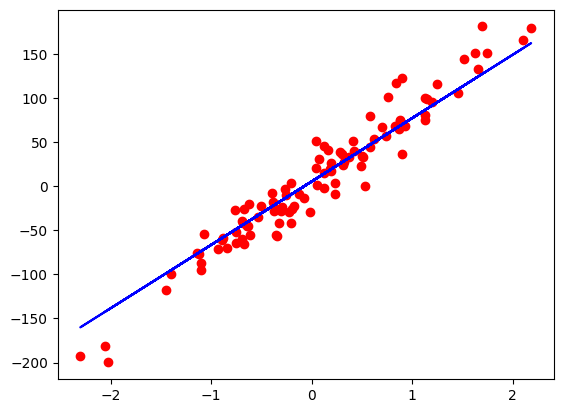

Epoch:  139
Cost: 397.93161010742187500000
Coefficients: 
m: 73.50374603271484375000
m (gradient): -14.24917030334472656250
b: 4.98674964904785156250
b (gradient): 0.77552890777587890625


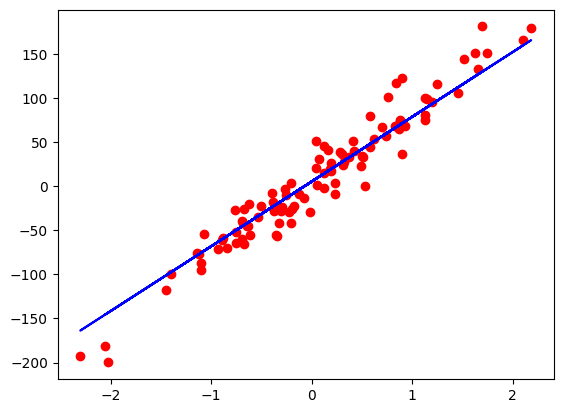

Epoch:  149
Cost: 380.32394409179687500000
Coefficients: 
m: 74.81142425537109375000
m (gradient): -12.16711044311523437500
b: 4.90870332717895507812
b (gradient): 0.78050285577774047852


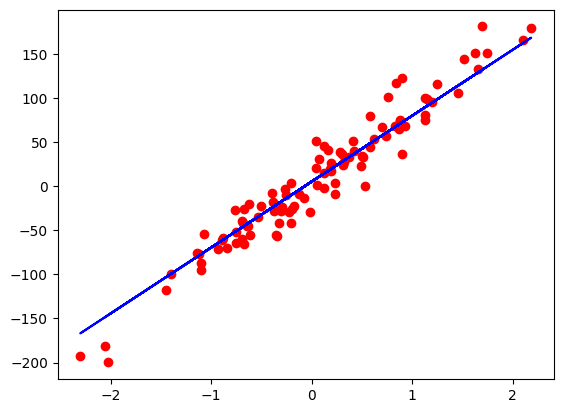

In [5]:
# TRAINING LOOP
num_epochs = 150
cost_counter = []
for epoch in range(num_epochs):
  # Forward pass and loss calculation
  y_hat = model(x)
  loss = criterion(y_hat, y)
  cost_counter.append(loss)

  # Backward pass (calculate gradients)
  loss.backward()

  # Update weights
  optimizer.step()

  if (epoch + 1) % 10 == 0:
    print('Epoch: ', epoch)
    print('Cost: {:.20f}'.format(loss.item()))
    print('Coefficients: ')
    print('m: {:.20f}'.format(model.weight.data.detach().item()))
    print('m (gradient): {:.20f}'.format(model.weight.grad.detach().item()))
    print('b: {:.20f}'.format(model.bias.data.detach().item()))
    print('b (gradient): {:.20f}'.format(model.bias.grad.detach().item()))

    final_prediction = y_hat.detach().numpy()
    plt.plot(x_numpy, y_numpy, 'ro')
    plt.plot(x_numpy, final_prediction, 'b')
    plt.show()

  # Clear the optimizer
  optimizer.zero_grad()